In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
import datetime

In [1]:
import gensim.downloader


In [2]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [10]:
glove_vectors = gensim.downloader.load('word2vec-ruscorpora-300')

[==================================================] 100.0% 198.8/198.8MB downloaded


In [94]:
words=list(glove_vectors.vocab.keys())

In [95]:
cutsymbs=[":", "_"]
cleanwords=[]
for word in words:
    clean = word[0]
    i=0
    while word[i+1] not in cutsymbs:
        clean+=word[i+1]
        i+=1
    cleanwords.append(clean)

In [55]:
glove_vectors.most_similar('apple_NOUN')

[('microsoft_NOUN', 0.6669869422912598),
 ('ibm_NOUN', 0.6601744890213013),
 ('ipad_NOUN', 0.6473356485366821),
 ('неwlett::packard_NOUN', 0.6466790437698364),
 ('стив::джобс_NOUN', 0.6429045796394348),
 ('compaq_NOUN', 0.6296855807304382),
 ('macintosh_NOUN', 0.6265138387680054),
 ('lenovo_NOUN', 0.6258187294006348),
 ('motorola_NOUN', 0.6203649044036865),
 ('смартфон_NOUN', 0.6199597716331482)]

In [96]:
cleanwords

['весь',
 'человек',
 'мочь',
 'год',
 'сказать',
 'время',
 'говорить',
 'становиться',
 'знать',
 'самый',
 'дело',
 'день',
 'жизнь',
 'рука',
 'очень',
 'первый',
 'давать',
 'новый',
 'слово',
 'иметь',
 'большой',
 'идти',
 'глаз',
 'место',
 'лицо',
 'видеть',
 'хотеть',
 'понимать',
 'должный',
 'работа',
 'каждый',
 'друг',
 'голова',
 'дом',
 'оставаться',
 'сторона',
 'начинать',
 'думать',
 'хорошо',
 'жить',
 'стоять',
 'спрашивать',
 'сделать',
 'выходить',
 'последний',
 'русский',
 'сила',
 'получать',
 'какой-то',
 'хороший',
 'случай',
 'вопрос',
 'отвечать',
 'россия',
 'несколько',
 'мир',
 'город',
 'делать',
 'пойти',
 'приходить',
 'земля',
 'принимать',
 'часть',
 'вид',
 'ребенок',
 'конец',
 'взять',
 'всякий',
 'находить',
 'высокий',
 'сидеть',
 'что-то',
 'отец',
 'оказываться',
 'вода',
 'смотреть',
 'москва',
 'час',
 'являться',
 'народ',
 'любить',
 'проходить',
 'никто',
 'образ',
 'казаться',
 'женщина',
 'бог',
 'нога',
 'страна',
 'голос',
 'писать'

In [97]:
words

['весь_DET',
 'человек_NOUN',
 'мочь_VERB',
 'год_NOUN',
 'сказать_VERB',
 'время_NOUN',
 'говорить_VERB',
 'становиться_VERB',
 'знать_VERB',
 'самый_DET',
 'дело_NOUN',
 'день_NOUN',
 'жизнь_NOUN',
 'рука_NOUN',
 'очень_ADV',
 'первый_ADJ',
 'давать_VERB',
 'новый_ADJ',
 'слово_NOUN',
 'иметь_VERB',
 'большой_ADJ',
 'идти_VERB',
 'глаз_NOUN',
 'место_NOUN',
 'лицо_NOUN',
 'видеть_VERB',
 'хотеть_VERB',
 'понимать_VERB',
 'должный_ADJ',
 'работа_NOUN',
 'каждый_DET',
 'друг_NOUN',
 'голова_NOUN',
 'дом_NOUN',
 'оставаться_VERB',
 'сторона_NOUN',
 'начинать_VERB',
 'думать_VERB',
 'хорошо_ADV',
 'жить_VERB',
 'стоять_VERB',
 'спрашивать_VERB',
 'сделать_VERB',
 'выходить_VERB',
 'последний_ADJ',
 'русский_ADJ',
 'сила_NOUN',
 'получать_VERB',
 'какой-то_DET',
 'хороший_ADJ',
 'случай_NOUN',
 'вопрос_NOUN',
 'отвечать_VERB',
 'россия_NOUN',
 'несколько_NUM',
 'мир_NOUN',
 'город_NOUN',
 'делать_VERB',
 'пойти_VERB',
 'приходить_VERB',
 'земля_NOUN',
 'принимать_VERB',
 'часть_NOUN',
 'в

In [77]:
glove_vectors.get_vector('яблоко_NOUN')

array([ 4.16352339e-02,  6.44713938e-02, -8.55202153e-02, -5.79170734e-02,
        2.75890343e-02, -1.85643453e-02,  3.69282775e-02,  3.44568156e-02,
       -5.60245700e-02, -7.71315917e-02,  4.95299548e-02,  2.05855239e-02,
       -9.42526851e-03,  5.98796979e-02,  3.40499077e-03, -7.10126460e-02,
        6.99929744e-02, -2.77963970e-02,  5.57216667e-02,  1.29094543e-02,
       -7.05553293e-02, -1.35116447e-02, -2.56033782e-02,  5.25563210e-02,
       -3.90213281e-02, -5.32758087e-02,  9.78375375e-02, -1.09390117e-01,
       -3.11327670e-02, -5.42223044e-02,  6.16936348e-02,  7.93228820e-02,
        1.54521704e-01,  8.38155393e-03, -6.67934194e-02, -8.27612728e-03,
       -4.71919440e-02, -1.26785114e-01,  8.37007388e-02,  5.83530739e-02,
        7.30118230e-02, -1.16545719e-03,  4.21420373e-02, -4.30011339e-02,
        4.41543274e-02, -2.66371779e-02,  1.01740457e-01, -4.50710468e-02,
       -3.30404378e-03,  1.68887079e-02, -8.76717418e-02, -4.89782244e-02,
        4.23250161e-02,  

In [102]:
glove_vectors.get_vector(words[0]).shape

(300,)

In [104]:
fail300=np.ones(300)
fail300

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [108]:
def FindWordInVocab(word):
    word=word.lower()
    if word in cleanwords:
        index=cleanwords.index(word)
        return glove_vectors.get_vector(words[index])
    else:
        return fail300

In [30]:
vector.shape

(100,)

In [114]:
FindWordInVocab("Пипка")

array([-0.07171874,  0.03396419,  0.02582986,  0.02569104, -0.03251575,
       -0.02082034, -0.00815374,  0.10088891, -0.06404886, -0.01397524,
       -0.00690797, -0.04190082,  0.00753512, -0.04140075, -0.01222073,
       -0.06936705,  0.07436707,  0.03079922, -0.03839584,  0.04539169,
       -0.05864422,  0.07156827, -0.06183272,  0.13347974, -0.097586  ,
        0.10085849,  0.01718512, -0.01214201, -0.04953327, -0.08977054,
       -0.04455958,  0.04920099,  0.06117357,  0.00907186, -0.06556313,
        0.00080312,  0.05092779, -0.04946298, -0.14165944, -0.05634728,
        0.07749356, -0.06913964, -0.02431823,  0.02508402,  0.06587725,
       -0.10554003, -0.00955425,  0.02045219,  0.0213708 , -0.11288642,
       -0.01123568, -0.06475706, -0.08540139,  0.00259316,  0.0518961 ,
       -0.04337724, -0.01588525, -0.02289424, -0.1294235 , -0.08895937,
        0.01404845,  0.02005601, -0.00780186, -0.02595398,  0.02369612,
        0.03520329, -0.12664112,  0.0216809 ,  0.05273273,  0.04

In [8]:
data=pd.read_json("data.json")

In [117]:
wordlist = data["text"][0].split()

In [119]:
def EncodeData(wordlist=wordlist):
    vector_words = []
    for word in wordlist:
        vector_words.append(FindWordInVocab(word))
    return vector_words

In [127]:
ans=np.array(EncodeData())
print(ans.shape)

(318, 300)


In [128]:
len(wordlist)

318

In [33]:
import xgboost as xgb

In [20]:
#datetime.datetime(*ti.strptime("2007-03-04T21:08:12", "%Y-%m-%dT%H:%M:%S")[:6])

In [13]:
todrop=["pubdate", "text"]

In [15]:
for i in todrop:    
    data2=data.drop(i, axis=1)

In [17]:
data2=data2.drop("pubdate", axis=1)

In [19]:
from sklearn.model_selection import train_test_split

In [29]:
features = np.array(data2.drop("views", axis=1))

In [27]:
labels=np.array(data2["views"])

In [30]:
features

array([[ 6,  6,  1, 32],
       [ 4,  4,  1,  0],
       [ 3,  3,  1,  0],
       ...,
       [14, 14,  5,  7],
       [ 8, 10,  1,  2],
       [15, 15,  9, 51]])

In [28]:
labels

array([ 4295,   554,   231,  3031,  6519,  6712, 15863,  5611, 19324,
        4223,  6942,  8037,  4741,  2636,  3760,  3900,  6063,  1206,
         349,   406,  1565,  2261, 51598, 11981,  2886,  2194,  4215,
        7302, 30936,  5465,  9959,  6495,  2988, 13744,  3536,  9027,
        6848,  2293,  2492,  4338,  2408,  8462,  1930, 12734,  2303,
        3209,  1313,  8580,  8229,  7430, 15878,  6659, 12656, 11039,
       16014,  4792,  4180, 11259,  8229,  2256,  2804, 11764,  4949,
         692,  8324,  5465,   386,  4347, 10999, 32611, 23120,  5833,
        5843,  5204,  6179,  2783,  4508, 13377,  3522, 18707,  8225,
       26391,   432,  7050,  5858,  3542,  5363,  3317,  1952, 16802,
        1929, 12694,  4409, 16420, 16531,  2923,   541,  7570,  4831,
        3041,  9409, 13619,  7824,  5871, 34327, 21355,  8449,  5675,
       32593, 14324, 11142,  4779,  8996,  4939,  4687,  8353,  3429,
         288,  6214,  7966,  1705,  3582,   790,  1458,  4796,  1664,
        1500, 13220,

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [32]:
X_train.shape

(700, 4)

In [34]:
model=xgb.XGBClassifier()

In [ ]:
from sklearn.linear

In [39]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
predictions=model.predict(X_test)

In [45]:
import matplotlib.pyplot as plt

Text(0,0.5,'Views')

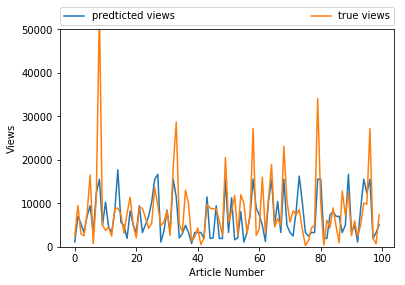

In [67]:
plt.plot(predictions[:100], label="predticted views")
plt.plot(y_test[:100], label="true views")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(0, 50000)
#plt.ylegend()
plt.xlabel("Article Number")
plt.ylabel("Views")

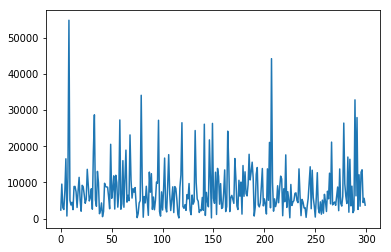

In [51]:
plt.plot(y_test)